# FCA Take-home Assessment

Name: German  
Surnames: Martinez-Ayuso

## Loading environmment

In [1]:
%qtconsole

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
colors_ = sns.color_palette("Paired")
sns.set_palette(colors_)


### Loading file

In [3]:
df = pd.read_csv('data set.csv', sep=';')

print(df.shape)


(41188, 1)


In [4]:
# Checking the dataframe
df.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


It seems there is a problem in the text file. Let's read the first lines

In [5]:
def print_lines(file_name,n):
    i=0 
    with open(file_name) as file:        
        while i < n:
            line = file.readline()
            print(line)    
            i += 1 

print_lines('data set.csv',5)

"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""

"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";""no"";""telephone"";""may"";""mon"";261;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"57;""services"";""married"";""high.school"";""unknown"";""no"";""no"";""telephone"";""may"";""mon"";149;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"37;""services"";""married"";""high.school"";""no"";""yes"";""no"";""telephone"";""may"";""mon"";226;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""

"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no"";""telephone"";""may"";""mon"";151;1;999;0;""nonexistent"";1.1;93.994;-36.4;4.857;5191;""no"""



It seems there are many quotes ("") which I don't find them useful. I'm going to remove them.

I could use 'find and replace' from a decent text editor such as Sublime Text to replace the "" by nothing. However, for the purpose of this assessment, I would like to keep everything logged in this notebook. 

In [6]:
# Read the text and perform the replacing. 
with open('data set.csv') as f:
    newText=f.read().replace('"', '')

# Writing the output to another file.
with open('data set_fixed.csv', "w") as f:
    f.write(newText)

# Printing again
print_lines('data set_fixed.csv', 5)

age;job;marital;education;default;housing;loan;contact;month;day_of_week;duration;campaign;pdays;previous;poutcome;emp.var.rate;cons.price.idx;cons.conf.idx;euribor3m;nr.employed;y

56;housemaid;married;basic.4y;no;no;no;telephone;may;mon;261;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

57;services;married;high.school;unknown;no;no;telephone;may;mon;149;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

37;services;married;high.school;no;yes;no;telephone;may;mon;226;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no

40;admin.;married;basic.6y;no;no;no;telephone;may;mon;151;1;999;0;nonexistent;1.1;93.994;-36.4;4.857;5191;no



In [7]:
df = pd.read_csv('data set_fixed.csv',sep=';')

print(df.shape)
df.sample()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18831,44,admin.,single,university.degree,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.97,5228.1,no


## Exploratory Data Analysis


Let's have a look at the data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

No null-data. However this type of data is represented in some columns as 999. 

In [9]:
df[df==999].count()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              2
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

The values of pdays are almost missing.


In [10]:
num_non_suplied_pdays = df['pdays'][df['pdays']==999].count()

print('The percentage of missing data is: {:.2f}%'.format(100*num_non_suplied_pdays/len(df)))

The percentage of missing data is: 96.32%


The data of this column then is not relevant. I will delete it.


In [11]:
del df['pdays']

Now only two rows has non-values (999), and it is in the duration column. However checking the distribution of the data, we might think that the 999 values are actually data. 


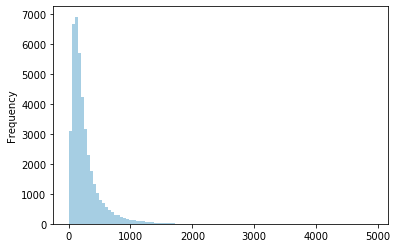

In [12]:
df.duration.plot.hist(bins=100);

The values are reasonable and since there is no indication in the assessment that there is missing data, I will not change the data based on this criteria. 

Let's check for duplicated values.


In [13]:
prev_ = df.shape[0]
df.drop_duplicates(inplace=True)

print("Number of rows deleted: {}".format(prev_ - df.shape[0]))

Number of rows deleted: 12


Let's check also if there are any conflicting rows. For example, all the variables are the same but the subscription is different.


In [14]:
prev_ = df.shape[0]
df.drop_duplicates(subset=df.columns[:-1],keep=False,inplace=True)

print("Number of rows deleted: {}".format(prev_ - df.shape[0]))


Number of rows deleted: 0


This is a good sign.

Let's check what type of values do we have. 

In [15]:
# Let's examine the unique values
for col in df:
    print(col.title(),'  ',df[col].dtype)
    pprint(df[col].unique())
    print('\n')

Age    int64
array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)


Job    object
array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)


Marital    object
array(['married', 'single', 'divorced', 'unknown'], dtype=object)


Education    object
array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)


Default    object
array(['no', 'unknown', 'yes'], dtype=object)


Housing    object
array(['no', 'yes', 'unknown'], dtype=object)


Loan    object
arr

I'm going to change the type of data in the solution column (21). From categorical to numerical.

Eventually I'm going to need to repeat this change in the rest of the categorical variables. But let's see first what type of data are we handeling. 

In [16]:
# Replacing by int.
df['y'] = [
    1 if x=='yes' else 0 for x in df.y
]

Let's print some graphs to understand the data. 

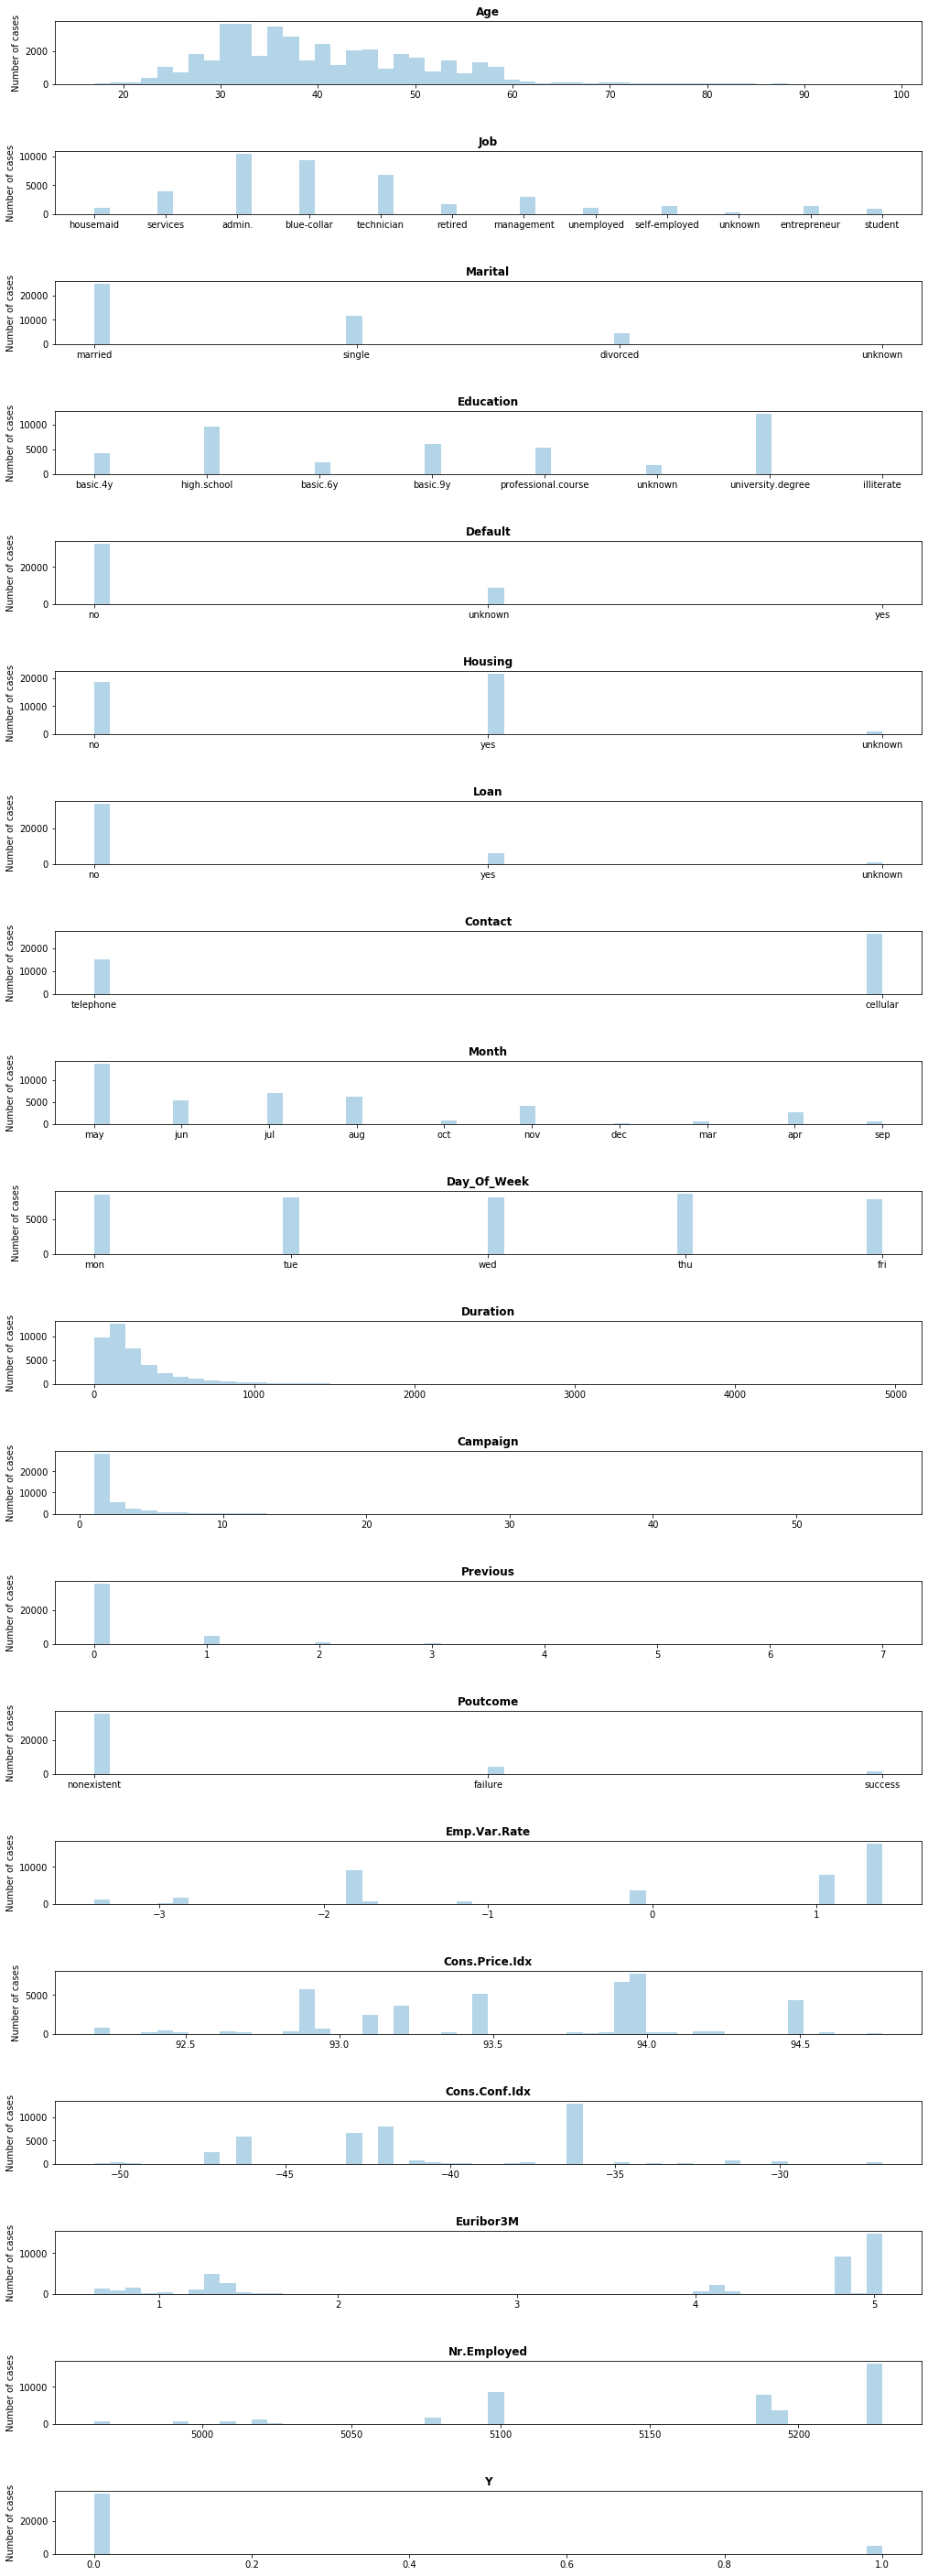

In [17]:
def plot_all(df):
    
    n=len(df.columns)
    fig, ax = plt.subplots(n, figsize = (15, n*2))
    for i, each_ in enumerate(df):
        d, bins, patches = ax[i].hist(df[each_], 50, alpha = 0.85)
        ax[i].set_title(each_.title(), fontweight="bold")
        ax[i].set_ylabel("Number of cases")
    #     ax[i].set_xlabel(each_.title())

    plt.tight_layout(pad=4)
    plt.show()

plot_all(df)

### Numerical variables


Let's plot also some relationships. Since there are many columns, the `pairplot` command would take quite a lot of time to plot. 

    pair_grid = sns.pairplot(df,hue='y', height=6); # The grid will be very big.

So we are going to plot the numerical variables so far. 

In [18]:
# So let's filter the columns to the numerical ones. 
vars_ = [each_column for each_column in df.columns.to_list() if np.issubdtype(df[each_column].dtype, np.number) ]

print(vars_)

['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


C:\Users\German\.conda\envs\invest\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\German\.conda\envs\invest\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


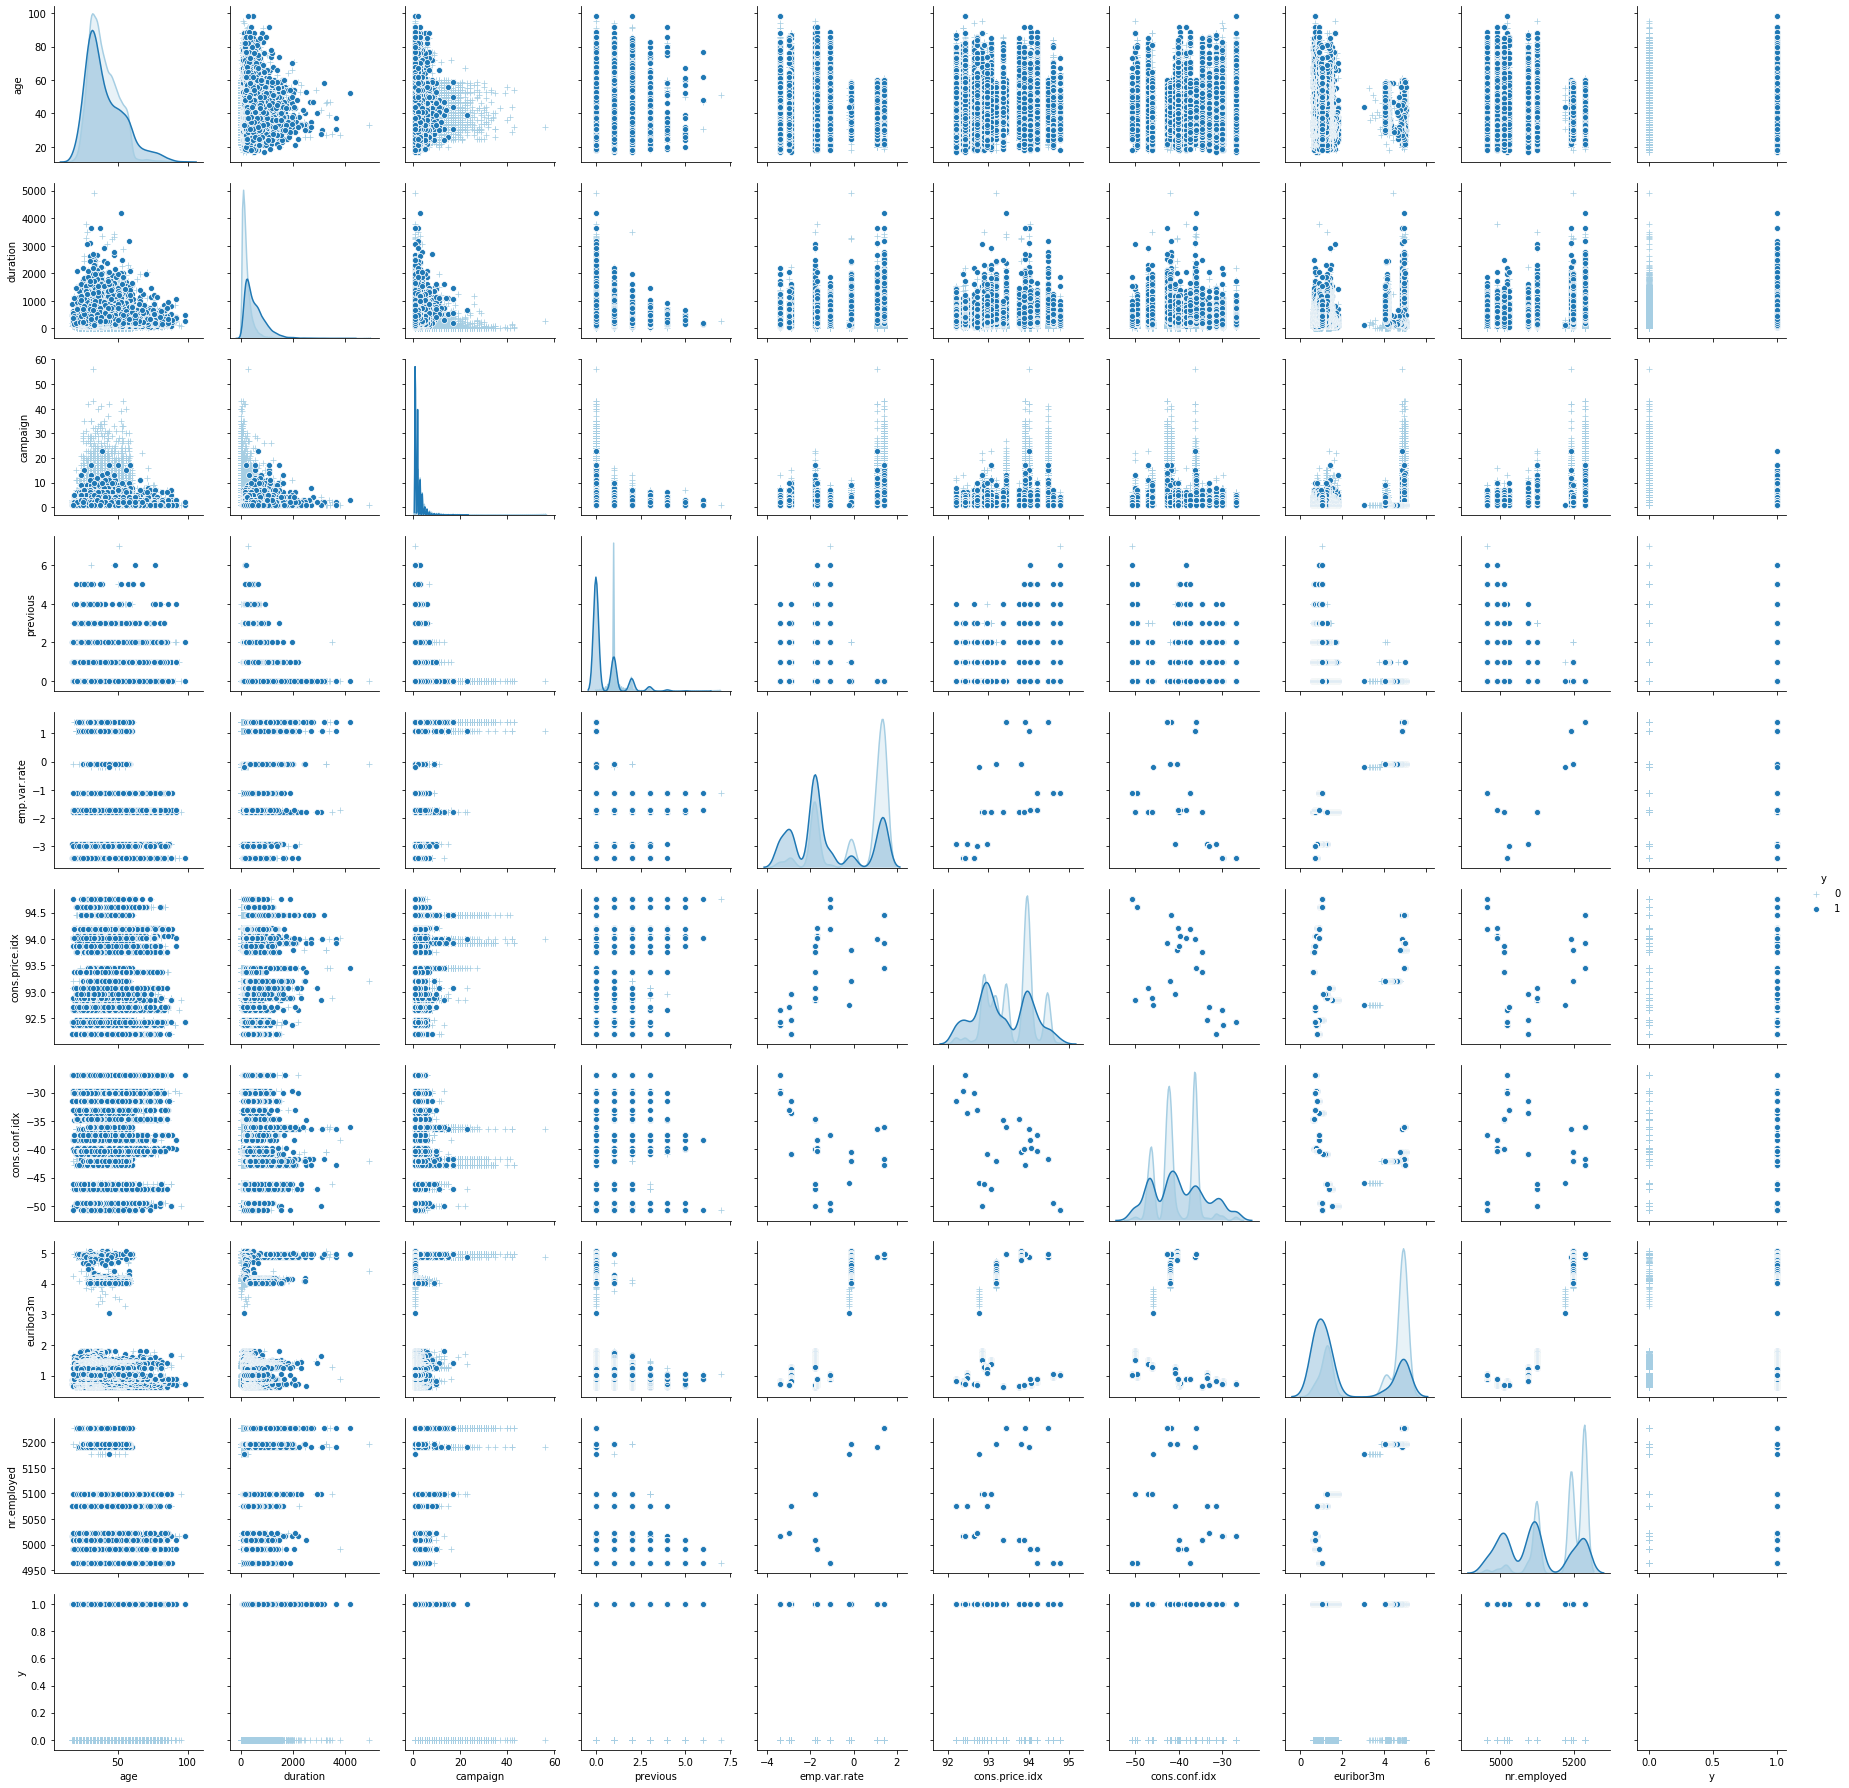

In [19]:
# Plotting

pair_grid = sns.pairplot(df,hue='y', # to plot the points with the marker depending on the subscribed or not 
                         markers=["+",'o'], #['no','yes']
                         x_vars=vars_,
                         y_vars=vars_
                        )

The command sns.pairplot() do "By default, this function will create a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column." (from Seaborn documentation) 

From that plot we can see some interesting notes:

- the graph campaing vs age shows that there is a low rate of subscription when the campaing contacts exceed 15. In fact for the range of ages 22 to 60, most of the realisation are non over 10 contacts. 


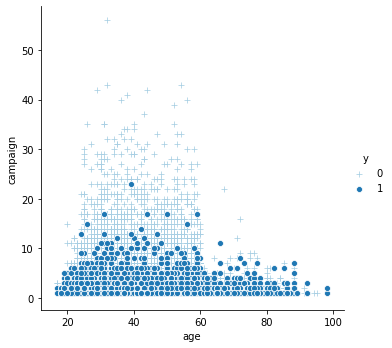

In [20]:
pair_grid = sns.pairplot(df,hue='y', # to plot the points with the marker depending on the subscribed or not 
                         markers=["+",'o'],
                         x_vars='age',
                         y_vars='campaign',
                         height = 5
                        )

- when the duration of the phone call is low, most of the calls ends in no subscriptions. That would make sense since if the person is not interested in the product, he won't keep the call for long. 

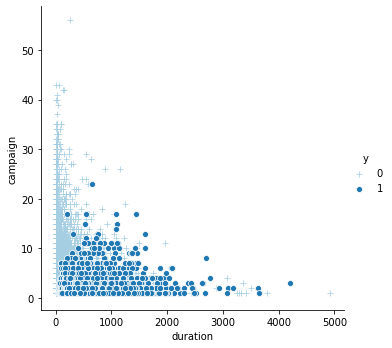

In [21]:
pair_grid = sns.pairplot(df,hue='y', # to plot the points with the marker depending on the subscribed or not 
                         markers=["+",'o'],
                         x_vars=vars_[1],
                         y_vars=vars_[2],
                         height = 5
                        )

There are some columns where the data is quite spreaded. For example 'duration', 'campaing', 'pdays' and 'previous'. These might be outliers. 

I'm going to see more clearly how the data is spreaded in those columns and decide after. Let's analyse each one of the variables.

#### 'Age'

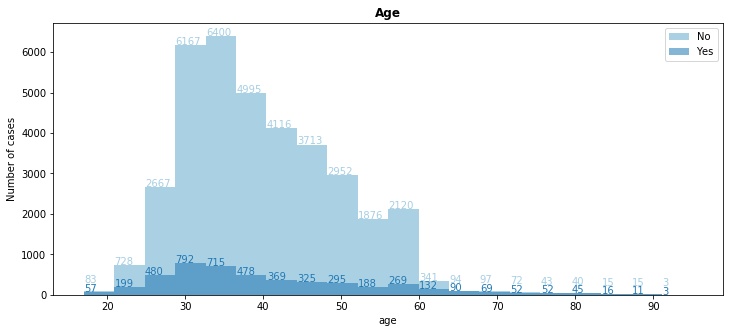

In [22]:
def inspect_num_var(df,name_column,bins=20): 
    fig, ax = plt.subplots(1, figsize = (12,5))

    d, bins, patches = ax.hist(df[df['y']==0][name_column], bins, alpha = 0.95, label='No',color=colors_[0])

    for i, each_patch in enumerate(patches): 
        #To avoid overlapping
        if each_patch.get_height()< 208:
            heigh_ = each_patch.get_height() + 208
        else:
            heigh_ = each_patch.get_height() + 8

        ax.annotate('{:.0f}'.format(d[i]), (each_patch.get_x()+0.05, heigh_),color=colors_[0])

    d, bins, patches = ax.hist(df[df['y']==1][name_column], bins, alpha = 0.55, label='Yes',color=colors_[1])

    for i, each_patch in enumerate(patches): 
        ax.annotate('{:.0f}'.format(d[i]), (each_patch.get_x()+0.05, each_patch.get_height()+8),color=colors_[1])

    ax.set_title(name_column.title(), fontweight="bold")
    ax.set_ylabel("Number of cases")
    ax.set_xlabel(name_column) 
    ax.legend()

inspect_num_var(df,'age')


In [23]:
def get_pearson_coeff(df,name_column,range_=None):
    print("\nPearson correlation for variable '{}'".format(name_column))
    corr_ = df[[name_column,'y']].corr()['y'].loc[name_column]
    print('Total number of values: {:<4} - Pearson correlation: {}'.format(len(df[name_column]),round(corr_,3)))

    if range_ == None:
        range_ = range(np.floor(df[name_column].min()),np.ceil(df[name_column].max()),10)
    
    range_=list(range_)
    for i, each_ in enumerate(range_[0:-1]):
        inf_lim = each_
        sup_lim = range_[i+1]
         
        sub_ = df[ (sup_lim>df[name_column]) &  (df[name_column]>inf_lim)][[name_column,'y']]
        corr_ = sub_.corr()['y'].loc[name_column]        
        num_ = sub_[name_column].count()
        print("\tRange {:>2} ({:>3} -{:>3})- Number of values: {:>6} - Pearson correlation: {}".format(i+1,round(inf_lim,3),round(sup_lim,3),num_,round(corr_,3)))
    
    
get_pearson_coeff(df,'age',range(0,90,10))


Pearson correlation for variable 'age'
Total number of values: 41176 - Pearson correlation: 0.03
	Range  1 (  0 - 10)- Number of values:      0 - Pearson correlation: nan
	Range  2 ( 10 - 20)- Number of values:     75 - Pearson correlation: 0.053
	Range  3 ( 20 - 30)- Number of values:   5527 - Pearson correlation: -0.081
	Range  4 ( 30 - 40)- Number of values:  15219 - Pearson correlation: -0.027
	Range  5 ( 40 - 50)- Number of values:   9362 - Pearson correlation: -0.011
	Range  6 ( 50 - 60)- Number of values:   5986 - Pearson correlation: 0.026
	Range  7 ( 60 - 70)- Number of values:    441 - Pearson correlation: 0.036
	Range  8 ( 70 - 80)- Number of values:    271 - Pearson correlation: 0.122


#### 'Duration'


Pearson correlation for variable 'duration'
Total number of values: 41176 - Pearson correlation: 0.405
	Range  1 (  0 -1000)- Number of values:  40211 - Pearson correlation: 0.373
	Range  2 (1000 -2000)- Number of values:    896 - Pearson correlation: 0.032
	Range  3 (2000 -3000)- Number of values:     45 - Pearson correlation: 0.006
	Range  4 (3000 -4000)- Number of values:     13 - Pearson correlation: -0.114


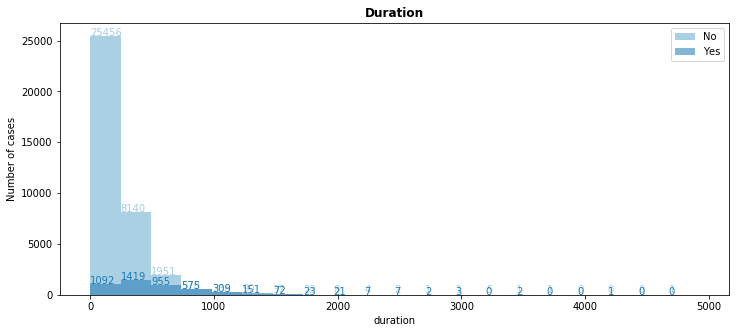

In [24]:
inspect_num_var(df,'duration')
get_pearson_coeff(df,'duration',range(0,5000,1000))

The 'duration' is a variable which can't be used for prediction. Since it is an outcome after the contact. You already know if the client has subscribed the product by the end of the call. 

Then this parameter should not be used in the model predictions.

In [25]:
df.drop(axis=1,labels='duration', inplace=True)
print(df.shape)

(41176, 19)


#### 'Campaign'


Pearson correlation for variable 'campaign'
Total number of values: 41176 - Pearson correlation: -0.066
	Range  1 (  0 -  5)- Number of values:  36192 - Pearson correlation: -0.035
	Range  2 (  5 - 10)- Number of values:   2291 - Pearson correlation: -0.039
	Range  3 ( 10 - 15)- Number of values:    463 - Pearson correlation: -0.082
	Range  4 ( 15 - 20)- Number of values:    168 - Pearson correlation: -0.03
	Range  5 ( 20 - 25)- Number of values:     72 - Pearson correlation: 0.072
	Range  6 ( 25 - 30)- Number of values:     37 - Pearson correlation: nan
	Range  7 ( 30 - 35)- Number of values:     18 - Pearson correlation: nan
	Range  8 ( 35 - 40)- Number of values:      2 - Pearson correlation: nan


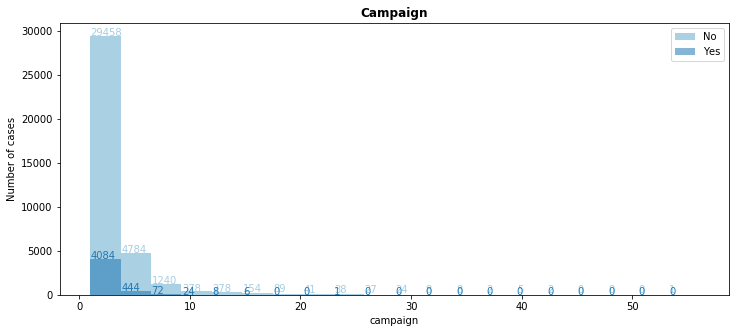

In [26]:
inspect_num_var(df,'campaign')

get_pearson_coeff(df,'campaign',range(0,45,5))

There are some nan values which means there might not be data enough for calculating the correlation. 

In [27]:
df[df['campaign']>20][['campaign','y']].groupby('y').count() # Not enough positive cases. 

,campaign
y,
0,156
1,1


I can delete all data where the number of contacts has been over 30. 


In [28]:
df.drop(axis=0,index=df[df['campaign']>30].index, inplace=True)
print(df.shape)

(41143, 19)


Since we already eliminated the column 'pdays' because it has many data missing.


#### 'Previous'

Let's go for 'previous'.


Pearson correlation for variable 'previous'
Total number of values: 41143 - Pearson correlation: 0.23
	Range  1 (  0 -  1)- Number of values:      0 - Pearson correlation: nan
	Range  2 (  1 -  2)- Number of values:      0 - Pearson correlation: nan
	Range  3 (  2 -  3)- Number of values:      0 - Pearson correlation: nan
	Range  4 (  3 -  4)- Number of values:      0 - Pearson correlation: nan
	Range  5 (  4 -  5)- Number of values:      0 - Pearson correlation: nan
	Range  6 (  5 -  6)- Number of values:      0 - Pearson correlation: nan
	Range  7 (  6 -  7)- Number of values:      0 - Pearson correlation: nan
	Range  8 (  7 -  8)- Number of values:      0 - Pearson correlation: nan
	Range  9 (  8 -  9)- Number of values:      0 - Pearson correlation: nan


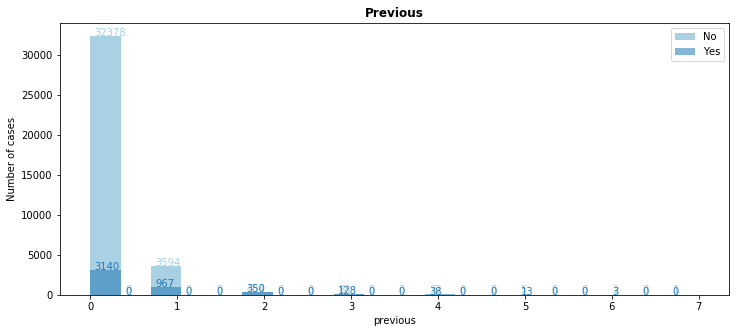

In [29]:
inspect_num_var(df,'previous')

get_pearson_coeff(df,'previous',range(0,10,1))

In [30]:
# Let's the values distribution
df[df['previous']>5][['previous','y']].groupby('y').count() # Not enough positive cases. 

,previous
y,
0,3
1,3


It is significative the strong correlationship between no subscription and very high number of contacts. Again, I believe there is not enough data (6 points only) when the number of contacts is higher than 5. So I will procede to delete those cases.

In [31]:
df.drop(axis=0,index=df[df['previous']>5].index, inplace=True)
print(df.shape)

(41137, 19)


#### 'emp.var.rate'


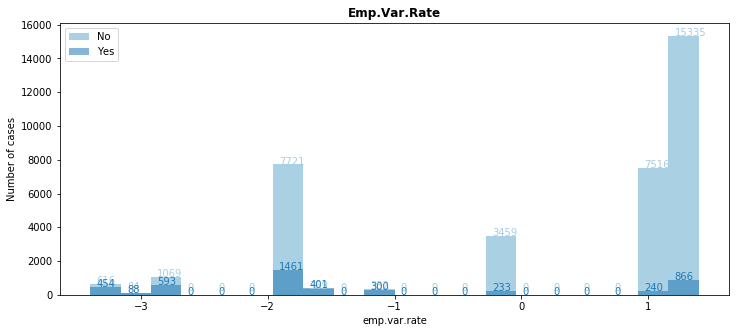

In [32]:
inspect_num_var(df,'emp.var.rate')

In [33]:
get_pearson_coeff(df,'emp.var.rate',range(-4,2))


Pearson correlation for variable 'emp.var.rate'
Total number of values: 41137 - Pearson correlation: -0.298
	Range  1 ( -4 - -3)- Number of values:   1070 - Pearson correlation: -0.0
	Range  2 ( -3 - -2)- Number of values:   1662 - Pearson correlation: nan
	Range  3 ( -2 - -1)- Number of values:  10584 - Pearson correlation: 0.203
	Range  4 ( -1 -  0)- Number of values:   3692 - Pearson correlation: -0.008
	Range  5 (  0 -  1)- Number of values:      0 - Pearson correlation: nan


Obviously when the employment is growing, the people feel more confident to adquire long term products.

#### 'cons.price.idx'

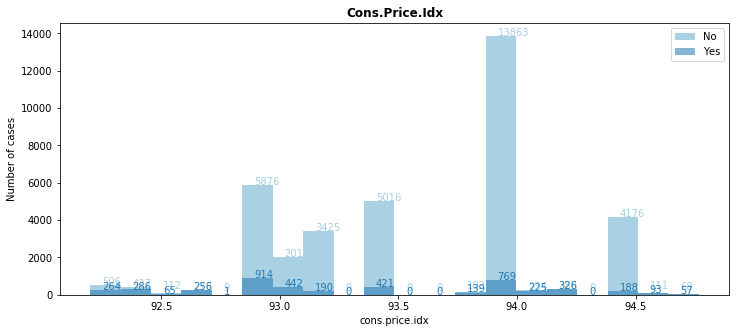

In [34]:
inspect_num_var(df,'cons.price.idx')

In [35]:
get_pearson_coeff(df,'cons.price.idx',range(91,97))


Pearson correlation for variable 'cons.price.idx'
Total number of values: 41137 - Pearson correlation: -0.136
	Range  1 ( 91 - 92)- Number of values:      0 - Pearson correlation: nan
	Range  2 ( 92 - 93)- Number of values:   8989 - Pearson correlation: -0.226
	Range  3 ( 93 - 94)- Number of values:  26382 - Pearson correlation: -0.095
	Range  4 ( 94 - 95)- Number of values:   5766 - Pearson correlation: -0.344
	Range  5 ( 95 - 96)- Number of values:      0 - Pearson correlation: nan


#### 'cons.conf.idx'


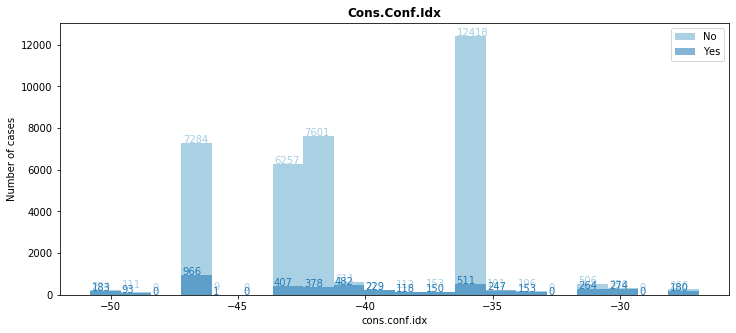

In [36]:
inspect_num_var(df,'cons.conf.idx')

In [37]:
get_pearson_coeff(df,'cons.conf.idx',range(-60,-20,5))


Pearson correlation for variable 'cons.conf.idx'
Total number of values: 41137 - Pearson correlation: 0.055
	Range  1 (-60 --55)- Number of values:      0 - Pearson correlation: nan
	Range  2 (-55 --50)- Number of values:    125 - Pearson correlation: -0.0
	Range  3 (-50 --45)- Number of values:   8464 - Pearson correlation: -0.198
	Range  4 (-45 --40)- Number of values:  15736 - Pearson correlation: 0.252
	Range  5 (-40 --35)- Number of values:  13691 - Pearson correlation: -0.356
	Range  6 (-35 --30)- Number of values:   1914 - Pearson correlation: -0.105
	Range  7 (-30 --25)- Number of values:    713 - Pearson correlation: 0.007


I can extract any conclusion from this graph and correlation values. However it is interesting to see such big spikes of No in -47, -42, -43 and -36. 

#### 'euribor3.m'


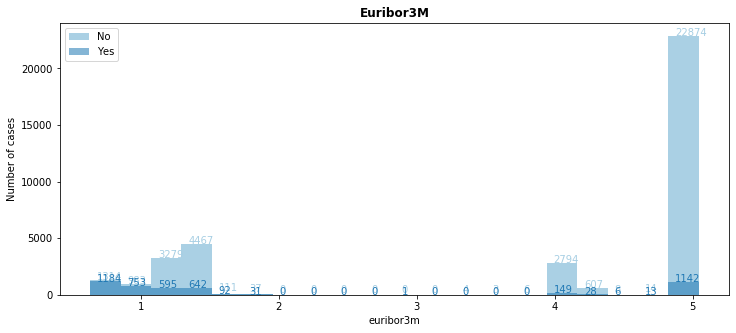

In [38]:
inspect_num_var(df,'euribor3m')

In [39]:
get_pearson_coeff(df,'euribor3m',range(0,6))


Pearson correlation for variable 'euribor3m'
Total number of values: 41137 - Pearson correlation: -0.307
	Range  1 (  0 -  1)- Number of values:   3886 - Pearson correlation: -0.08
	Range  2 (  1 -  2)- Number of values:   9584 - Pearson correlation: -0.001
	Range  3 (  2 -  3)- Number of values:      0 - Pearson correlation: nan
	Range  4 (  3 -  4)- Number of values:     14 - Pearson correlation: -0.602
	Range  5 (  4 -  5)- Number of values:  27619 - Pearson correlation: 0.002


Most of the data is around 5% which is where the euribor has been during the end of 2008 (https://www.euribor-rates.eu/en/euribor-rates-by-year/2008/), then it dropped to around 1% due to the financial crisis. 

#### 'nr.employed'

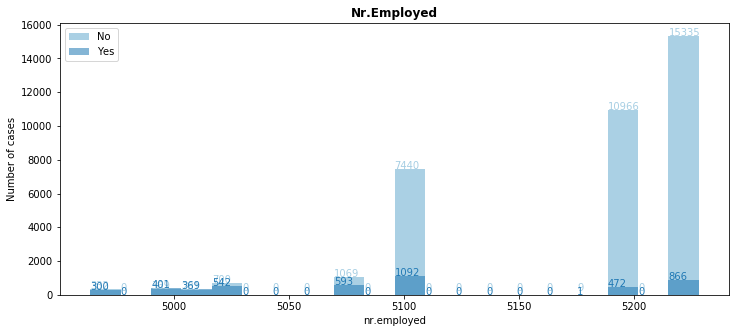

In [40]:
inspect_num_var(df,'nr.employed')

In [41]:
get_pearson_coeff(df, 'nr.employed', range(4750,5500,125))


Pearson correlation for variable 'nr.employed'
Total number of values: 41137 - Pearson correlation: -0.354
	Range  1 (4750 -4875)- Number of values:      0 - Pearson correlation: nan
	Range  2 (4875 -5000)- Number of values:   1402 - Pearson correlation: 0.046
	Range  3 (5000 -5125)- Number of values:  12086 - Pearson correlation: -0.321
	Range  4 (5125 -5250)- Number of values:  27649 - Pearson correlation: 0.031
	Range  5 (5250 -5375)- Number of values:      0 - Pearson correlation: nan


This variable represents the number of jobs created. This is another measurement of confident. 
And it is interesting how the higher this value gets:

- The higher number of data points we have. This is not relevant.
- The subscription rate falls. Around 5000 is much higher than around 5300. 

The later makes me believe that the consumers appreciate the product as a safety product which is good to have when the employment rate is not performing so well. 

#### Correlation analysis

Although we have printed correlation values, let's have a look in a global manner. 

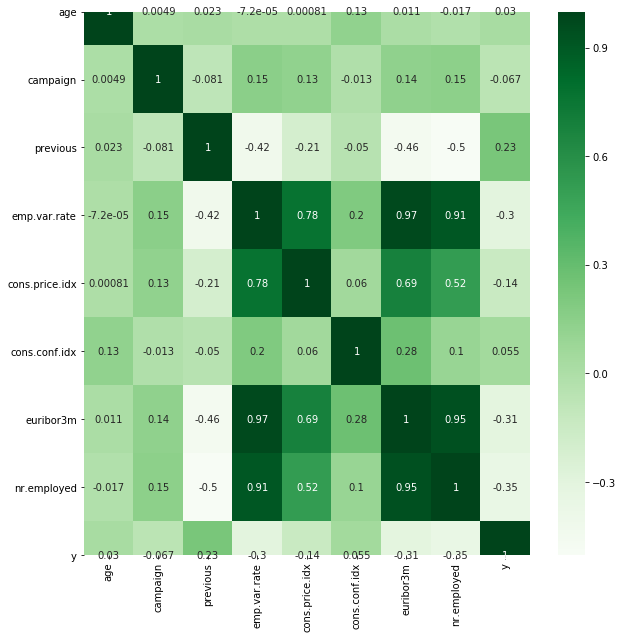

In [42]:
corr = df.corr()

fig = plt.figure(figsize = (10,10))
# corr.style.background_gradient(cmap='Greens').set_precision(2)
sns.heatmap(corr,cmap='Greens', annot = True);
fig.savefig('corr.png')


The correlation plot shows that the 'social and economic context variables' are quite related between each other. 

Let's see which columns are the best correlated to the subscribed variable ('y').

**Note**: It should be noticed that the Pearson coefficient assumes linearity between the variables, so in case of highly non-linear behaviour this coefficient might be missleading. 

A rasonable threshold for Pearson coefficient is over 0.2 for weak relationships and over 0.6 for strong relationships. However these values are highly dependent on each problem and they should be taken as suggestions.

In [43]:
# Lets see
max_correlated_variables = corr[corr['y'].abs()>0.2][corr['y'] !=1]['y']

print(max_correlated_variables)

previous        0.230594
emp.var.rate   -0.298076
euribor3m      -0.307476
nr.employed    -0.354387
Name: y, dtype: float64


C:\Users\German\.conda\envs\invest\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


It makes sense that 'previous' relate with higher number of sucessfull subscriptions. Clients which are interested will demand more information through longer calls or later contacts. However, as mentioned before, this relationship is not fully linear. For high values of 'previous', these relationships invert. 

The emp.var.rate states the employment variable rate which is related to the uncertainty about the jobs. Makes sense the relationship is negative. 
Same for euribor3m, which represents the price of borrowing money. Higher price in borrowing money will discorage the subscription to long term deposits. 


**Conclusions**
The pearson coefficients are quite low in the cases related to the variable 'y'. This tell us that the relationship between 'y' and the rest of the variables is non-linear and hence, algorithms such Linear SVM should be discarded.

In [44]:
df_before_cat = df

### Categorical Variables



Categorical variables needs to be converted to numbers in order to be used in the Machine learning algorithms. 
Also, the relationship between the possible values of these variables need to be kept. There several approaches to convert categorical variables to numeric. The most used is the OneHotEncoder which create a column per each possible value of a given parameter.


Before proceed to encode the categorical variables, let's also have a look at them:

#### 'Job' Encoding
Let's see the distribution

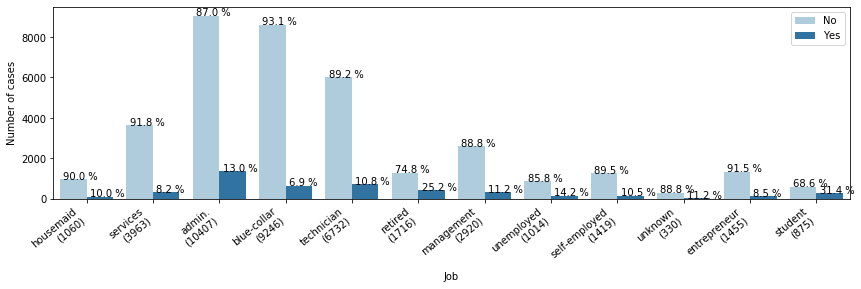

In [45]:
def inspect_cat_var(df, var):

    plt.figure(figsize=(12,4))
    ax = sns.countplot(data=df, x=var,hue='y')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.legend(labels=['No','Yes'])
    ax.set_xlabel(var.title())
    ax.set_ylabel('Number of cases')

    plt.tight_layout()

    labels = df[var].unique().tolist()
    labels.extend(labels)

    for i, p in enumerate(ax.patches):
        tot_ = df[df[var]==labels[i]][var].count() 
        ax.annotate('{:.1f} %'.format(100*p.get_height()/tot_), (p.get_x()+0.05, p.get_height()+8)) 


    # To write the number of examples of each value of the variable. 
    new_ = []
    for i,each_lab in enumerate(ax.xaxis.get_ticklabels()):
        tot_ = df[df[var]==df[var].unique()[i]][var].count()

        prev_ = each_lab.get_text()
        new_.append(prev_ + '\n' + '({})'.format(tot_)) 

    ax.set_xticklabels(new_) # Setting new labels
    plt.show()

inspect_cat_var(df,'job')

As we can see, there is high subscription rate between students, retired and unemployed. On the opposite side, we have blue-collar workers, services worker and entrepreneurs.

This might help to design new campaings to target groups with high subscription rate (since they seems interested in this type of product) or design new finantial products to target groups with low subscription rate. 

Let's proceed to enconde the variable. 


In [46]:
# Job types

def encode(df,var,prefix):
    type_var_dummies = pd.get_dummies(df[var], prefix = prefix)

    del df[var] # deleting the previous not encoded data
    
    print("Encoded '{}' variable.".format(var))
    return df.merge(type_var_dummies, left_index=True,right_index=True) 


df = encode(df,'job','job') 

Encoded 'job' variable.


#### 'Marital'


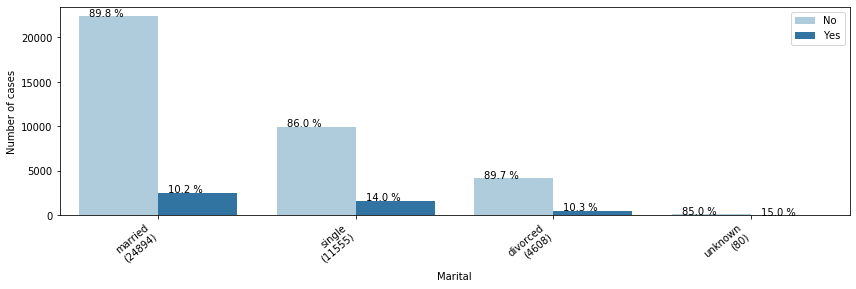

In [47]:
inspect_cat_var(df,'marital')

Interestingly, this type of finantial product is more sucessful between single.

Since we cannot extract any meaninful insight on the 'unknown' and since they are not much values, we will proceed to remove them in order to have a more accurate predition.

In [48]:
df.drop(axis=0,index = df[df['marital']=='unknown'].index)

print(df.shape)

(41137, 30)


In [49]:
# Encoding
df = encode(df,'marital','mar') 
 

Encoded 'marital' variable.


#### 'Education'


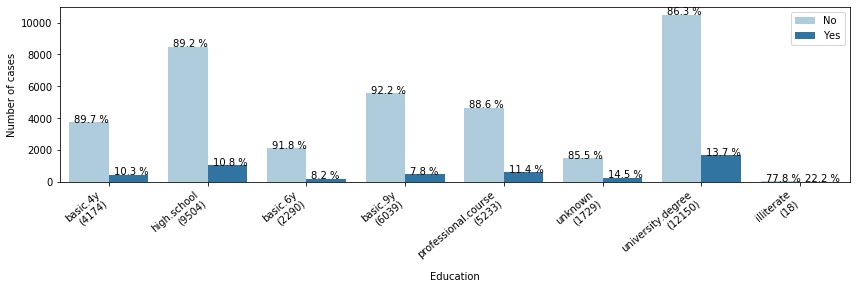

In [50]:
inspect_cat_var(df,'education')

The product is noticeably sucessful among illiterate and university-degree holders. It should be noticed also that for the case of illiterate, there is only 18 samples, which might not be representative. I'm going to delete every row related to that case.


In [51]:
df.drop(axis=0,index = df[df['education']=='illiterate'].index,inplace=True)

In [52]:
# Encoding
df = encode(df,'education','edu') 

Encoded 'education' variable.


#### 'Default'


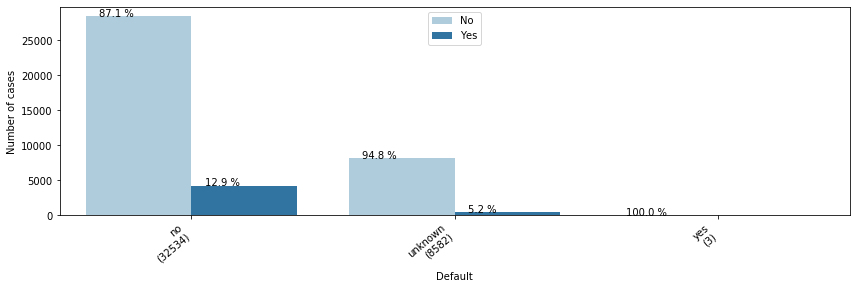

In [53]:
inspect_cat_var(df,'default')

This variable is interesting. An overwhelming mayority of the data is 'no' whereas a very small percentage is 'yes'. Only 3 rows out of the whole data set. This raise the question on why so many customer has declared 'unknown'. I understand that:
- Unknown might miss data missing. Still dificult to justify so many samples.
- Unknown might miss the customer prefered to not disclosure their default state. In that case we could assume something here. Either they are all in default o not. However the representativeness of the analysis will be seriously compromised.

Concluding, since there is no positive samples and we can't extract any useful insight from the unknown without knowing more about these cases.
We can try to see if those 'unknown' values have housing loan or personal loan.

In [54]:
hous_ = len(df[( df['default']=='unknown') & (df['housing']=='yes')])
tot_ = len(df[df['default']=='unknown'])
per_ = 100*hous_/tot_
print("Percentage of 'unknowns' which has housing loan: {:0.2f}%".format(per_))

loan_ = len(df[(df['default']=='unknown')&(df['loan']=='yes')])
tot_ = len(df[df['default']=='unknown'])
per_ = 100*loan_/tot_
print("Percentage of 'unknowns' which has personal loan: {:0.2f}%".format(per_))

Percentage of 'unknowns' which has housing loan: 50.76%
Percentage of 'unknowns' which has personal loan: 14.79%


This percentages are not enough to extract any conclusions. The 'unknown' samples doesn't seems to be in default. 

Hence I'm going to delete the whole variable to not influence the model. 

In [55]:
del df['default']

#### 'Housing' 


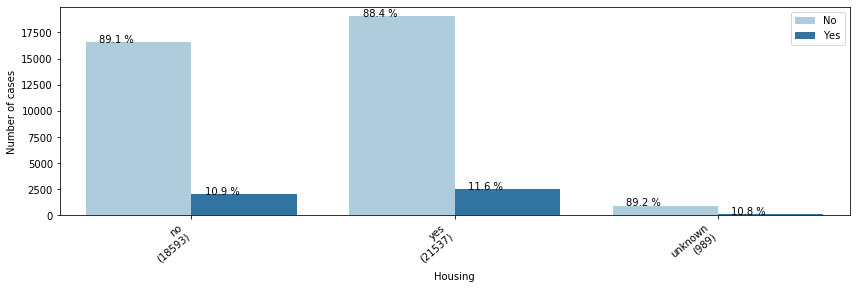

In [56]:
inspect_cat_var(df,'housing')

There is not much difference between having housing loan or not. 

Again, there is 'unknown' options. In this case there are quite a few more than in previous cases (around 1000). I believe the dataset have (even without these unknown) enough data to obtain accurate predictions.

However, other approaches could be followed such as:

- Filling in unknown values with the most frequent values
- Filling in unknown values by exploring correlations
- Filling in unknown values by exploring similarities between cases

But all these approaches should be used when there is not enough data.


In [57]:
df.drop(axis=0,index = df[df['housing']=='unknown'].index,inplace=True)

In [58]:
#Encoding
df = encode(df,'housing','hous')

Encoded 'housing' variable.


#### 'Loan'


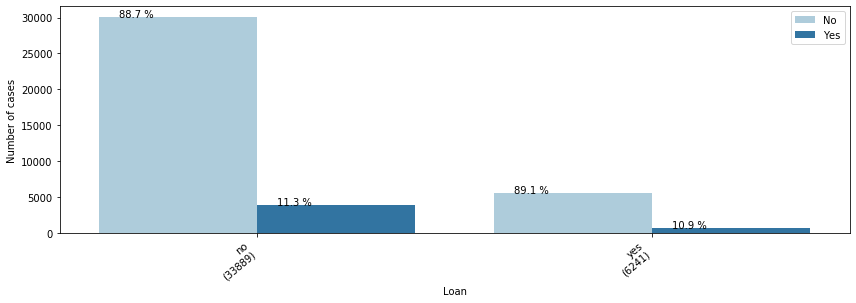

In [59]:
inspect_cat_var(df,'loan')

Surpringly there is not a single unknown value here. 

The customer without personal loans are more pronne to subscribe the term deposit. 

In [60]:
#Encoding
df = encode(df,'loan','loan')

Encoded 'loan' variable.


#### 'Contact' 

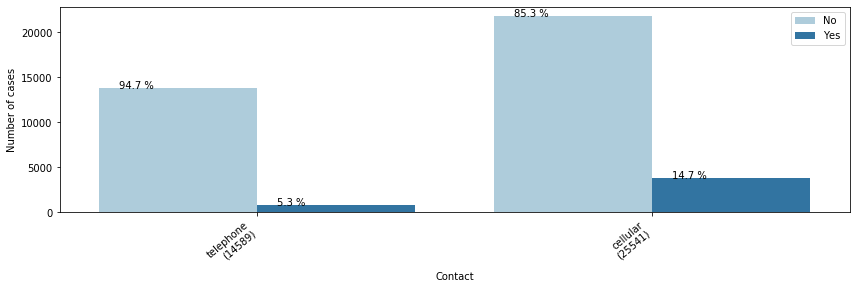

In [61]:
inspect_cat_var(df,'contact')

It seems there is a more subscription rate when the communication is performed over the phone. Probably this is masking something else, for example higher rate of subscription among young people. We already shown that the people with high education have a high subscription rate. 

In [62]:
df = encode(df,'contact','con')

Encoded 'contact' variable.


#### 'Month' 

Here I'm going to assume that the behaviour of the subscription in each of the months is independent of the previous/later months. If this premise is not fullfilled, we cannot use the OneHotDecoder approach we have been using until now. 



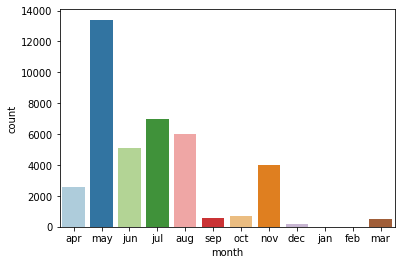

In [63]:
months_ = ['apr','may','jun','jul','aug','sep','oct','nov','dec','jan','feb','mar'] # Finantial year
sns.countplot(x='month',data=df,order=months_);

Over the year, it seems there is more subscriptons in the first half of the finantial year. However it seems to me there is not a clear trend accross different months. I think then we can assume without much error that the behaviour of each of the months is different to the previous/later month. 

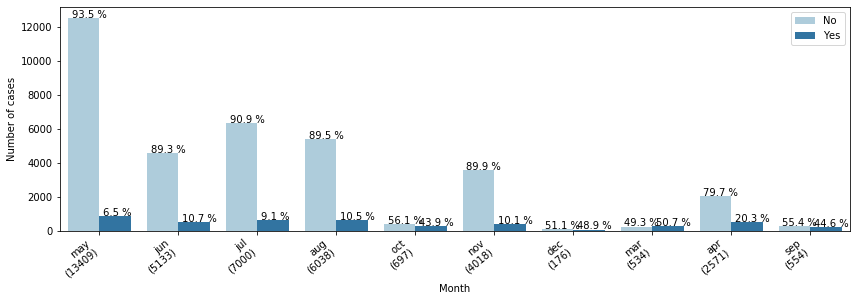

In [64]:
inspect_cat_var(df,'month')

It is quite interesting how the months with lower samples present remarkably high subscription rates.  For example, October, December, March, etc.. On the opposite to May, June, July or August.

This might be due to the bank agent can focus more in one client. This could be probed by checking the average ammount of contacts on those months.

In [65]:
low_months = ['oct','dec','mar','sep'] # Months with less than 1000 samples. 

low_months_df = df[df['month'].isin(low_months)]
high_months_df = df[~df['month'].isin(low_months)]

def print_data_months(low_months_df):
    print("Average contacts (campaign): {:0.3f}".format(low_months_df['campaign'].mean()))
    print("Average previous contacts (previous): {:0.3f}".format(low_months_df['previous'].mean()))
    print("Percentage of successful subcriptions: {:0.3f}%".format(len(low_months_df[low_months_df['y']==1])*100/len(low_months_df) ))
    more_common_poutcome = low_months_df.groupby('poutcome').count()['age'].idxmax()
    print("Most common outcome previous campaing (poutcome): {}".format(more_common_poutcome))
    print('\n')

print('Low months')
print_data_months(low_months_df)

print('High months')
print_data_months(high_months_df)


Low months
Average contacts (campaign): 1.837
Average previous contacts (previous): 0.643
Percentage of successful subcriptions: 46.405%
Most common outcome previous campaing (poutcome): nonexistent


High months
Average contacts (campaign): 2.579
Average previous contacts (previous): 0.148
Percentage of successful subcriptions: 9.471%
Most common outcome previous campaing (poutcome): nonexistent




Interestingly, the average number of contacts during the low months is lower than during the high months. However the previous contacts is higher in low months than in high months.

It makes senses to assume that the campaigns focus on certain months which will correspond to the high months since they have more samples.

This makes me thing that during campaigns the clients are contacted too much (average 2.579) with respect to other non-campaign months (1.84). 

In [66]:
print('Low months-Yes')
print_data_months(low_months_df[low_months_df['y']==1])

print('High months-Yes')
print_data_months(high_months_df[high_months_df['y']==1])


print('Low months-No')
print_data_months(low_months_df[low_months_df['y']==0])

print('High months-No')
print_data_months(high_months_df[high_months_df['y']==0])

Low months-Yes
Average contacts (campaign): 1.714
Average previous contacts (previous): 0.741
Percentage of successful subcriptions: 100.000%
Most common outcome previous campaing (poutcome): nonexistent


High months-Yes
Average contacts (campaign): 2.145
Average previous contacts (previous): 0.422
Percentage of successful subcriptions: 100.000%
Most common outcome previous campaing (poutcome): nonexistent


Low months-No
Average contacts (campaign): 1.944
Average previous contacts (previous): 0.558
Percentage of successful subcriptions: 0.000%
Most common outcome previous campaing (poutcome): nonexistent


High months-No
Average contacts (campaign): 2.624
Average previous contacts (previous): 0.119
Percentage of successful subcriptions: 0.000%
Most common outcome previous campaing (poutcome): nonexistent




High number of contacts during a campaign seems to not be very efficient. 

Let's proceed to encode the data.

In [67]:
df = encode(df,'month','mon')

Encoded 'month' variable.


#### 'Day_of_week'

Here we follow the same approached followed with the month variable.

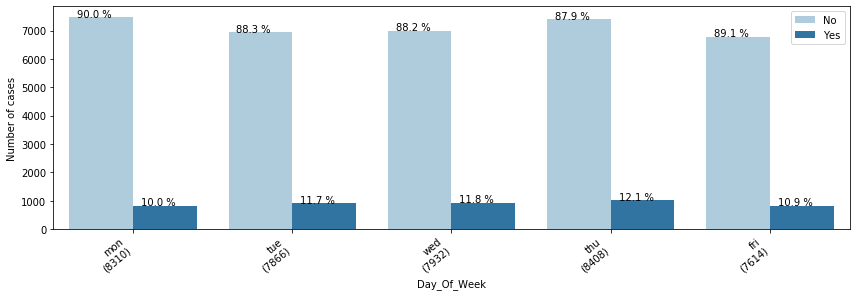

In [68]:
inspect_cat_var(df,'day_of_week')

Here all days have similar percentage of sucess. Hence I don't this variable is very relevant.  

Let's encode the data.

In [69]:
df = encode(df,'day_of_week','wday')

Encoded 'day_of_week' variable.


#### 'poutcome' 

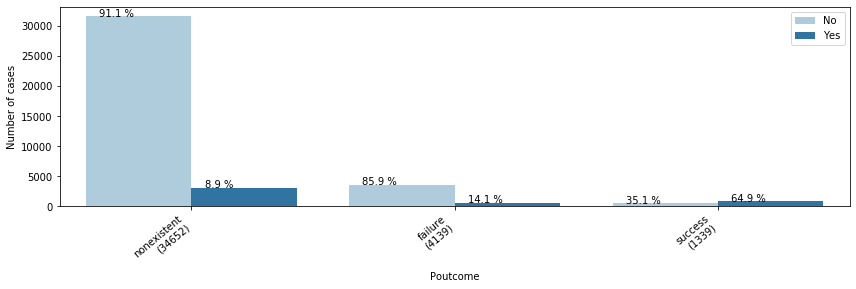

In [70]:
inspect_cat_var(df,'poutcome')

This graph shows that the rate of success is quite high when there has been previous contacts ('poutcome' equal to failure or success). 

Also the rate of success is quite high in clients who already have been contacted successfully (poutcome=success). This might mean that the clients are very possitive about the product which makes them to subscribe to more of them. Somehow this can be related to the client loyalty. 

The subscription rate for success is very high compared other cases. I would probably feel tempted to contact more of the current customers since they might be happy to subscribe more term deposits.

Let's encode this variable.

In [71]:
df = encode(df,'poutcome','pout')

Encoded 'poutcome' variable.


The encoding of the variables is finished. 

Now all the variables in our dataframe should numerical.


In [72]:
df.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,...,mon_oct,mon_sep,wday_fri,wday_mon,wday_thu,wday_tue,wday_wed,pout_failure,pout_nonexistent,pout_success
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [73]:
df.sample()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,...,mon_oct,mon_sep,wday_fri,wday_mon,wday_thu,wday_tue,wday_wed,pout_failure,pout_nonexistent,pout_success
28152,24,2,0,-1.8,93.075,-47.1,1.466,5099.1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [74]:
df.shape

(40130, 56)

In [75]:
%store df
# %store -r df

Stored 'df' (DataFrame)


### Splitting of data

Previously to use the machine learning algorithms on the data, we need to split the data en three sets:

- **All Training data (80 %)**: Data used to build the model. 
    - **Training (80 %)**: Data used to train the model. 
    - **Tuning (20 %)**: Data used to tune the model. For example, find appropriate hyperparameters. However, some algorithms already implement mechanisms to randomly select this tunning set from the training set. So we might not use it at all.  
    
- **Test data (20 %)**: Data used for validation of the model. Data never seen by the algorithm during traininng. 

In [76]:
from sklearn.model_selection import train_test_split

data_X = df.drop(columns='y'); print("Shape of data_X {}".format(data_X.shape))
data_y = df['y']; print("Shape of data_y {}".format(data_y.shape))


X_training_all, X_test, y_training_all, y_test = train_test_split(data_X,data_y, test_size=0.2)

X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

%store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (40130, 55)
Shape of data_y (40130,)
Stored 'X_training' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_training' (Series)
Stored 'y_test' (Series)
Stored 'X_tuning' (DataFrame)
Stored 'y_tuning' (Series)
Stored 'X_training_all' (DataFrame)
Stored 'y_training_all' (Series)


## Question 1: Develop a mode (*Model-1*) that, given variables 1-20, predicts the probability of a client subscribing for the product

As mentioned before, during the cleaning of the variables we have deleted two variables:

- 'default' for having most of the values either 'No' or 'unknown' hence we just can not extract any conclusion. 

- 'pdays' for having too much missing data (96%)



### Disclaimer.

During working on the present assessment, I found out the next article 'https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c' [[Link]](#TDS_roy_telemarketing)
In the mentioned article, several machine learning algorithms are used on the same dataset as the one proposed for this assessment. The accuracy results are shown in the next figure:


![machine learning results TDS](https://miro.medium.com/max/520/1*ef4jZpU_3fkiLsjKr93YmA.png)

Since this article already approach different algorithms, I considered it might be more interesting to use the best one of this article. 

This article mentioned a scientific paper which analyse an extended version (more variables) of this data set. Four models are tested: logistic regression, decision trees (DTs), neural network (NN) and support vector machine. Using two metrics, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve (ALIFT). The best results are obtained for Neural networks with an AUC value of 0.8.


**Paper:**

[Moro et al., 2014]  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 https://doi.org/10.1016/j.dss.2014.03.001  [[Link]](#MORO201422)

**Notes**

The author of the article uses the AUC parameter to measure performace. However in links [[Link]](#jeniAUCF1) and [[Link]](#liu_1966) it is mentioned that this paremeter might not be the best for highly imbalanced dataset.

In our case the training set (*X_training*) has 7132 samples with only 883 possitive samples. The ratio negative/possitive is 8.077. The balance of a set can be measured more accurately using the *Shannon entropy* [[Link]](#hilman_1966). 

$$\mbox{Balance} = \frac{H}{\log{k}} = \frac{-\sum_{ i = 1}^k \frac{c_i}{n} \log{ \frac{c_i}{n}}.  } {\log{k}}$$

which is equalt to:
- 0 for unbalanced datasets.
- 1 for balanced datasets.


In [77]:
def balance(seq): # From link [4]
    from collections import Counter
    from numpy import log

    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)

    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

print("The balance (Shannon entropy) of 'y_training' is {}.".format(balance(y_training)))
print("The balance (Shannon entropy) of 'y_tuning' is {}.".format(balance(y_tuning)))
print("The balance (Shannon entropy) of 'y_test' is {}.".format(balance(y_test)))
print('\n')
print("The balance (Shannon entropy) of the complete dataset is {}.".format(balance(df['y'])))

The balance (Shannon entropy) of 'y_training' is 0.50667522686548.
The balance (Shannon entropy) of 'y_tuning' is 0.5118672680917505.
The balance (Shannon entropy) of 'y_test' is 0.5100321056131099.


The balance (Shannon entropy) of the complete dataset is 0.5081808686846814.


As we can see, the dataset is moderately balanced. Therefore we could use any scoring measurement. 

In order to compare with the article [[Link]](#TDS_roy_telemarketing) we will use the AUC. 
This scoring parameter measure the area under the ROC curve. This curve is created by plotting the true positive rate against the false positive rate at various threshold settings. 
More information on this parameter in [[Link]](#wikipedia_2020).

In [78]:
# For restoring the data if needed.
# %store -r X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

### XGBoost Model

This model is the one which shows the best performance in the cited article. Hence we are going to replicate it and compare it with other model.

In [79]:
from sklearn.metrics import roc_auc_score as measure_roc_auc

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [80]:
x_cfl = XGBClassifier(tree_method='gpu_hist', max_bin=16)

# Space search for the parameters. 
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500,1000,2000],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5,1],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.1,0.3,0.5,1]                    #Denotes the fraction of observations to be randomly samples for each tree.
}


#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl=RandomizedSearchCV(x_cfl,
                              param_distributions=prams,
                              verbose=1,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=1 #To speed up calculations
                             )


# random_cfl.fit(X_training_all, y_training_all) #Training

#save the data, since it takes long to run. 
# 
# %store random_cfl 
%store -r random_cfl

pprint(random_cfl.best_params_)
print("The AUC score is {}".format(random_cfl.best_score_))


{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'subsample': 1}
The AUC score is 0.7957722669123404


Let's see if the model is overfitting the data by running the model over the test data

In [81]:
# %store -r random_cfl
predict_y = random_cfl.predict_proba(X_test)
print("The test AUC for test data is: {}".format(measure_roc_auc(y_test, predict_y[:, 1])))

predict_y = random_cfl.predict_proba(X_training_all)
print("The test AUC for tunning data is: {}".format(measure_roc_auc(y_training_all, predict_y[:, 1])))

The test AUC for test data is: 0.8149756932218989
The test AUC for tunning data is: 0.8117587691388689


The AUC values are consistent accross all the subsets which makes me think the model does not overfit the data. 

The best parameters have been obtained.

Let's see what are the most important parameters. 

In [82]:

from xgboost import plot_importance
from xgboost import plot_tree

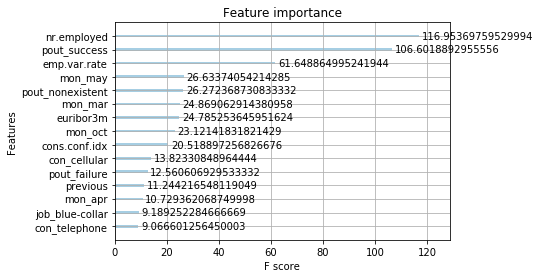

In [83]:
model = random_cfl.best_estimator_
ax = plot_importance(model, importance_type='gain',max_num_features=15);

As we can see in the above figure, the most important variables identified by the XGBoost algorithm are 'nr.employed', 'euribor3m' and 'pout_success'. 

It should be noticed that the importance is given in terms of F1 score. Althought we have choosen to use AUC score, the results should be similar with both metrics. 

The XGBoost shows around 0.8 accuracy. This is already quite high. 

In the mentioned paper [[Link]](#MORO201422), the maximum accuracy obtained is 0.8 which is close to the result obtained in the article [[Link]](TDS_roy_telemarketing) and by ourselves.  

### Gaussian Naive Bayes

Although the article implements many algorithms, I'm going to try to implement one it hasn't been implemented: the **naive bayes**. 

This algorithm is based on Bayes theorem [[Link]](#wikipedia_2020b) and it is quite suitable to perform quick predictions on big datasets as our.

In [84]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

predict_y = gnb.fit(X_training, y_training).predict(X_test)

print("The test AUC for tunning data is: {}".format(measure_roc_auc(y_test, predict_y.T)))

The test AUC for tunning data is: 0.6897627386666173


The naive bayes does not show a higher accuracy than the XGBoost. Hence we will keep using the XGBoost.


## Question 2: Identify which variable is the most predictive of a client’s subscription

The variables more important for the prediction are those identified in the plot_importance graph.

"Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model." 

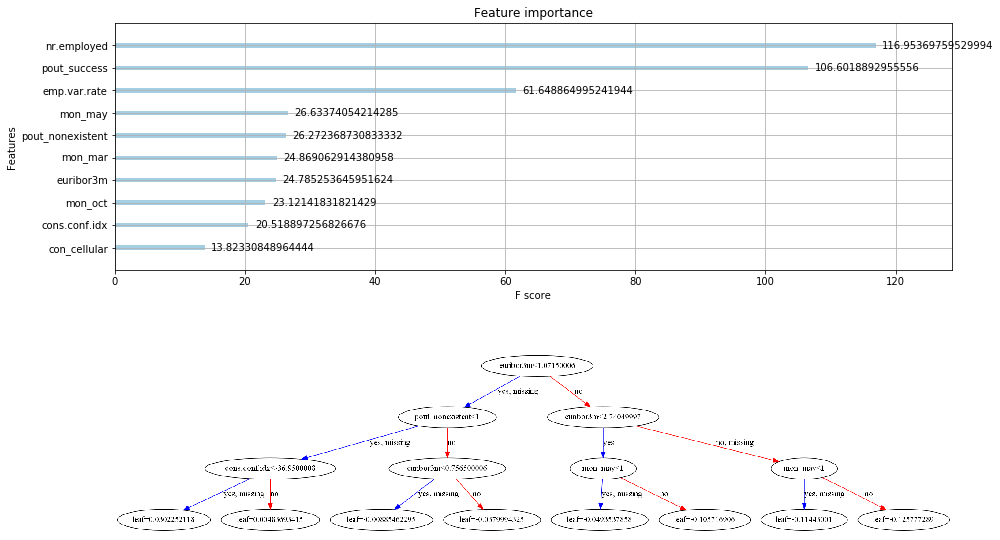

In [85]:
fig,ax = plt.subplots(2, figsize = (15,10))

plot_importance(model, importance_type='gain',max_num_features=10,ax=ax[0]); 
plot_tree(model, num_trees=6, ax=ax[1]); 

fig.savefig('xgboost.png', dpi=200)
plt.show()

As we can see the most important ones are the 'nr.employed', 'pout_success', 'emp.var.rate' and 'mon_may'. 

It should be noticed

**Note**

The values of accuracy depend, of course, of the configuration parameter values. In our case, the space search ('prams') has been chosen based on experience, but more optimum values might be available out of the chosen ranges.

## Question 3:  Identify any highly correlated pairs of variables

This has been already answered in two parts, correlation analysis and importance variables.

### Linear correlation.

The **linear** correlationship between the different variables is analysed using the Pearson coefficient. This coefficient is a measure of the linear correlation between two variables X and Y [[Link]](#wikipedia_2020c). 

![Correlation](corr.png)

In [86]:
print("\nMaximum correlated variables with 'y'\n")
print(max_correlated_variables)


Maximum correlated variables with 'y'

previous        0.230594
emp.var.rate   -0.298076
euribor3m      -0.307476
nr.employed    -0.354387
Name: y, dtype: float64


### Nonlinear correlationship.
The **nonlinear** relationships can be explored by analysing the importance of the variables. This importance has been already obtained when training the XGBoost (or any tree model). 
Variables which has high important in the model will be correlated with the output variable ('y'). The importance reflects complex relationships between variables, including non-linear ones.

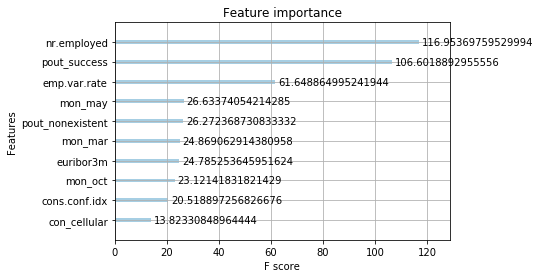

In [87]:
plot_importance(model, importance_type='gain',max_num_features=10);

## Question 4:  Develop a second model (Model-2) that uses only 5 of the provided variables explain your choice

When it comes to choose the variables which can optimise the model (feature selection), there are several approaches. The most common is to select the variables with high correlationship or importance. However other options are possible.
Other option is to run the model incrementally, adding new variables and check the metrics in order to see if the performance improves or not. Unfortunately, this approach is very computer intensive. Given the scope of this assessment, the first approach based on correlationship and importance will be used. 


Given the previous output (correlationship and importance), 'nr.employed' should be used. 'pout_success' and 'pout_nonexistent' represent 'poutcome' so it should be also included. 

'emp.var.rate' shows high linear correlationship and high importance, hence it should be included as well. 

There are now three candidates for the two position left. The candidates are 'euribor3m', 'cons.conf.idx' and 'month'.
All of them in the same range of importance. 

- Including 'month' will add many variables (one per month) which might increase the computation cost but it might probably enrich more the model than a numeric variable. 

- Including 'euribor3m' seems like a good idea because it has high importance and high correlationship. 

- 'cons.conf.idx' show lower importance than the previous ones, but on the opposite it is an numeric value so the computational cost is lower than a categorical variable ('month').



Let's have a look at 'cons.conf.idx'.

Unique values: [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
Mean value: -40.507034637428355
Standard deviation: 4.629884776264692





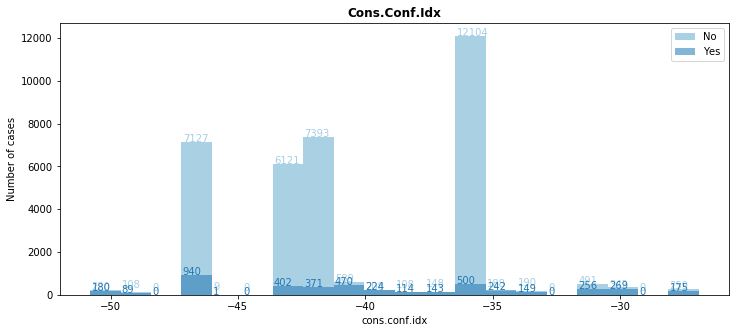

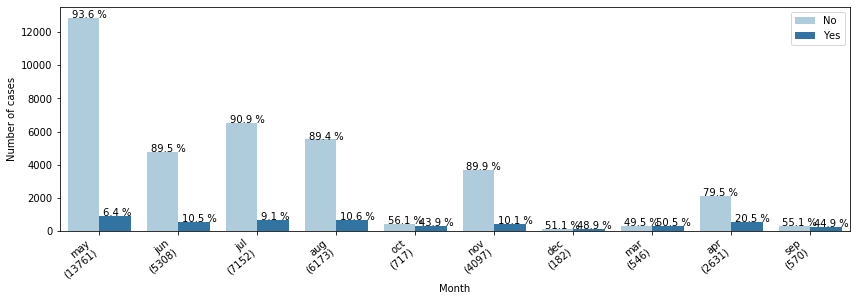

In [88]:
def inspect_(df,var):
    print("Unique values: {}".format(df[var].unique()))
    print("Mean value: {}".format(df[var].mean()))
    print("Standard deviation: {}".format(df[var].std()))

    

inspect_(df,'cons.conf.idx')
inspect_num_var(df,'cons.conf.idx')
print('\n\n')
inspect_cat_var(df_before_cat,'month')


I think the variable 'month' is richer (more variations) than the variable 'cons.conf.idx'. Hence I'm going to include this one and 'euribor3m'.


### Model 2. a)

In [89]:
var_patter = ['nr.employed','pout_','mon_', 'emp.var.rate', 'euribor3m']
reg = '|'.join(var_patter)

var_red = X_training.filter(regex=reg).columns
pprint(var_red.to_list())


['emp.var.rate',
 'euribor3m',
 'nr.employed',
 'mon_apr',
 'mon_aug',
 'mon_dec',
 'mon_jul',
 'mon_jun',
 'mon_mar',
 'mon_may',
 'mon_nov',
 'mon_oct',
 'mon_sep',
 'pout_failure',
 'pout_nonexistent',
 'pout_success']


I could just filter the columns on X_\*\*. However I believe redo the test split might be interesting from the point of view of sampling the subsets training, test and tuning. 


In [90]:
data_X = df[var_red]; print("Shape of data_X {}".format(data_X.shape))
data_y = df['y']; print("Shape of data_y {}".format(data_y.shape))


X_training_all, X_test, y_training_all, y_test = train_test_split(data_X,data_y, test_size=0.2)

X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

# %store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (40130, 16)
Shape of data_y (40130,)


In [91]:
x_cfl_red = XGBClassifier(tree_method='gpu_hist', max_bin=16)

# Space search for the parameters. # 
prams={
    'learning_rate':[0.05,0.1,0.15], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.5,1]                    #Denotes the fraction of observations to be randomly samples for each tree.
}

#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl_red=RandomizedSearchCV(x_cfl_red,
                              param_distributions=prams,
                              verbose=1,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=1 #To speed up calculations
                             )

# random_cfl_red.fit(X_training_all, y_training_all) #Training

#save the data, since it takes long to run. 
# %store random_cfl_red 
%store -r random_cfl_red 


pprint(random_cfl_red.best_params_)
print("The AUC score is {}".format(random_cfl_red.best_score_))

print('\n\n')

predict_y = random_cfl_red.predict_proba(X_test)
print("The test AUC for test data is: {}".format(measure_roc_auc(y_test, predict_y[:, 1])))

predict_y = random_cfl_red.predict_proba(X_training_all)
print("The test AUC for tunning data is: {}".format(measure_roc_auc(y_training_all, predict_y[:, 1])))

{'colsample_bytree': 0.3,
 'learning_rate': 0.15,
 'max_depth': 10,
 'n_estimators': 200,
 'subsample': 0.5}
The AUC score is 0.7905346468291649



The test AUC for test data is: 0.7965080184649049
The test AUC for tunning data is: 0.7979934343898069


### Model 2.b

Let's see what would have been with the 'cons.conf.idx'.


In [92]:
var_patter = ['nr.employed','pout_','conf', 'emp.var.rate', 'euribor3m']
reg = '|'.join(var_patter)

var_red = X_training.filter(regex=reg).columns
pprint(var_red.to_list())


['emp.var.rate',
 'euribor3m',
 'nr.employed',
 'pout_failure',
 'pout_nonexistent',
 'pout_success']


In [93]:
data_X = df[var_red]; print("Shape of data_X {}".format(data_X.shape))
data_y = df['y']; print("Shape of data_y {}".format(data_y.shape))


X_training_all, X_test, y_training_all, y_test = train_test_split(data_X,data_y, test_size=0.2)

X_training, X_tuning, y_training, y_tuning = train_test_split(X_training_all, y_training_all, test_size=0.2)

%store X_training X_test y_training y_test X_tuning y_tuning X_training_all y_training_all

Shape of data_X (40130, 6)
Shape of data_y (40130,)
Stored 'X_training' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_training' (Series)
Stored 'y_test' (Series)
Stored 'X_tuning' (DataFrame)
Stored 'y_tuning' (Series)
Stored 'X_training_all' (DataFrame)
Stored 'y_training_all' (Series)


In [94]:
x_cfl_red_alt = XGBClassifier(tree_method='gpu_hist', max_bin=16)

# Space search for the parameters. 
prams={
    'learning_rate':[0.05,0.1,0.15], #Step size shrinkage used to prevent overfitting. Range is [0,1]
    'n_estimators':[100,200,500],        #Number of trees you want to build.
    'max_depth':[3,5,10],                          #The maximum depth of a tree
    'colsample_bytree':[0.1,0.3,0.5],            #Denotes the fraction of columns to be randomly samples for each tree.
    'subsample':[0.5,1]                   #Denotes the fraction of observations to be randomly samples for each tree.
}
#RandomizedSearchCV search for the optimal set of hyperparameters
random_cfl_red_alt =RandomizedSearchCV(x_cfl_red_alt,
                              param_distributions=prams,
                              verbose=1,
                              n_iter=20, 
                              cv=10, 
                              scoring='roc_auc',
                              n_jobs=1 #To speed up calculations
                             )

random_cfl_red_alt.fit(X_training_all, y_training_all) #Training

pprint(random_cfl_red_alt.best_params_)
print("The AUC score is {}".format(random_cfl_red.best_score_))

#save the data, since it takes long to run. 
#%store random_cfl_red_alt 
%store -r random_cfl_red_alt 
print('\n\n')
predict_y = random_cfl_red_alt.predict_proba(X_test)
print("The test AUC for test data is: {}".format(measure_roc_auc(y_test, predict_y[:, 1])))

predict_y = random_cfl_red_alt.predict_proba(X_training_all)
print("The test AUC for tunning data is: {}".format(measure_roc_auc(y_training_all, predict_y[:, 1])))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 31.1min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 10,
 'n_estimators': 500,
 'subsample': 0.5}
The AUC score is 0.7905346468291649
Stored 'random_cfl_red_alt' (RandomizedSearchCV)



The test AUC for test data is: 0.7969866538431277
The test AUC for tunning data is: 0.7898205431319631


The accuracy (AUC) of this model is also around **0.79** but slightly lower than the model with 'month'. 


 \[ **Don't delete: Citations**\]
<!-- Examples of citations: [TDS](#TDS_roy_telemarketing) -->


<!--bibtex

@article{MORO201422,
title = "A data-driven approach to predict the success of bank telemarketing",
journal = "Decision Support Systems",
volume = "62",
pages = "22 - 31",
year = "2014",
issn = "0167-9236",
doi = "https://doi.org/10.1016/j.dss.2014.03.001",
url = "http://www.sciencedirect.com/science/article/pii/S016792361400061X",
author = "Sérgio Moro and Paulo Cortez and Paulo Rita",
keywords = "Bank deposits, Telemarketing, Savings, Classification, Neural networks, Variable selection",
abstract = "We propose a data mining (DM) approach to predict the success of telemarketing calls for selling bank long-term deposits. A Portuguese retail bank was addressed, with data collected from 2008 to 2013, thus including the effects of the recent financial crisis. We analyzed a large set of 150 features related with bank client, product and social-economic attributes. A semi-automatic feature selection was explored in the modeling phase, performed with the data prior to July 2012 and that allowed to select a reduced set of 22 features. We also compared four DM models: logistic regression, decision trees (DTs), neural network (NN) and support vector machine. Using two metrics, area of the receiver operating characteristic curve (AUC) and area of the LIFT cumulative curve (ALIFT), the four models were tested on an evaluation set, using the most recent data (after July 2012) and a rolling window scheme. The NN presented the best results (AUC=0.8 and ALIFT=0.7), allowing to reach 79% of the subscribers by selecting the half better classified clients. Also, two knowledge extraction methods, a sensitivity analysis and a DT, were applied to the NN model and revealed several key attributes (e.g., Euribor rate, direction of the call and bank agent experience). Such knowledge extraction confirmed the obtained model as credible and valuable for telemarketing campaign managers."
}

@misc{TDS_roy_telemarketing, 
title={Machine Learning Case Study: A data-driven approach to predict the success of bank telemarketing},
url={https://towardsdatascience.com/machine-learning-case-study-a-data-driven-approach-to-predict-the-success-of-bank-telemarketing-20e37d46c31c}, 
journal={Medium}, 
publisher={Towards Data Science}, 
author={Roy, Sukanta}, 
year={2020}, 
month={Jan}

@INPROCEEDINGS{jeniAUCF1,
author={L. A. {Jeni} and J. F. {Cohn} and F. {De La Torre}},
booktitle={2013 Humaine Association Conference on Affective Computing and Intelligent Interaction},
title={Facing Imbalanced Data--Recommendations for the Use of Performance Metrics},
year={2013},
volume={},
number={},
pages={245-251},
keywords={data handling;face recognition;image registration;learning (artificial intelligence);video coding;video signal processing;imbalanced data;performance metrics;facial action units;AU;situation analysis;automated video annotation;face tracking;face registration;machine learning;FACS coding;rank metrics;Measurement;Gold;Databases;Shape;Three-dimensional displays;Pain;Accuracy;imbalanced data;performance metrics;action unit detection;skew normalization},
doi={10.1109/ACII.2013.47},
ISSN={2156-8103},
month={Sep.},}
}

@misc{liu_1966, title={How to choose between ROC AUC and F1 score?}, url={https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score}, journal={Cross Validated}, author={Liu, George LiuGeorge}, year={1966}, month={Apr}}

@misc{hilman_1966, title={a general measure of data-set imbalance}, url={https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance}, journal={Cross Validated}, author={Hilman, Dror HilmanDror}, year={1966}, month={Sep}}

@misc{wikipedia_2020, title={Receiver operating characteristic}, url={https://en.wikipedia.org/wiki/Receiver_operating_characteristic}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Feb}}

@misc{wikipedia_2020b, title={Bayes' theorem}, url={https://en.wikipedia.org/wiki/Bayes'_theorem}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Jan}}

@misc{wikipedia_2020c, title={Pearson correlation coefficient}, url={https://en.wikipedia.org/wiki/Pearson_correlation_coefficient}, journal={Wikipedia}, publisher={Wikimedia Foundation}, year={2020}, month={Feb}}

-->


# References

